In [1]:
%pip install matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
cesmatm_none = [8.51727, 5.22955, 3.74382, 2.87232, 2.13119]
exaalt_none = [5.93166, 3.82407, 2.79205, 2.20533, 1.8127]
isabel_none = [13.0726, 7.8411, 5.47935, 4.166, 3.2348]

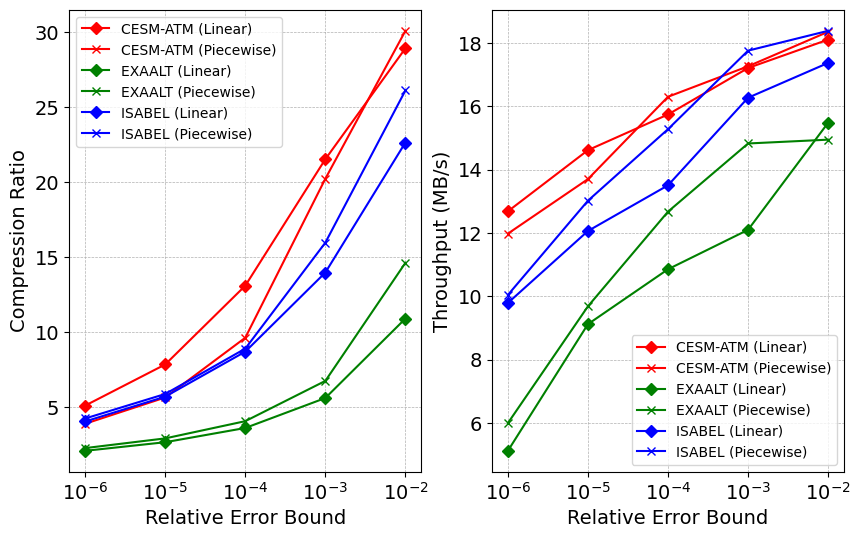

In [4]:

# Data from the table
error = [1E-2, 1E-3, 1E-4, 1E-5, 1E-6]
cesmatm_linear = [28.9174, 21.5305, 13.1007, 7.85203, 5.11015]
cesmatm_piecewise = [30.0833, 20.2278, 9.63278, 5.6513, 3.90227]
exaalt_linear = [10.9089, 5.61556, 3.61953, 2.67058, 2.09698]
exaalt_piecewise = [14.6232, 6.75561, 4.07255, 2.92552, 2.27867]
isabel_linear = [22.6406, 13.9774, 8.70602, 5.70724, 4.05292]
isabel_piecewise = [26.1106, 15.9692, 8.90599, 5.88438, 4.25159]

cesmatm_linear_tp = [i/1000 for i in [18109.9, 17213.4, 15746.3, 14619.6, 12688.2]]
cesmatm_piecewise_tp = [i/1000 for i in [18357, 17267.3, 16305.1, 13705.5,11983.8]]
exaalt_linear_tp = [i/1000 for i in [15485.8, 12104.7, 10859.3, 9125.83, 5126.17]]
exaalt_piecewise_tp = [i/1000 for i in [14950.9, 14830.4, 12678.3, 9689.17, 6001.6]]
isabel_linear_tp = [i/1000 for i in [17374.2, 16275, 13509.5, 12067.8, 9795.28]]
isabel_piecewise_tp = [i/1000 for i in [18387.4, 17761.7, 15282.4, 13024.1, 10048]]


# Create the plot
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot data
ax.plot(error, cesmatm_linear, label='CESM-ATM (Linear)', marker='D', color='red')
ax.plot(error, cesmatm_piecewise, label='CESM-ATM (Piecewise)', marker='x', color='red')
ax.plot(error, exaalt_linear, label='EXAALT (Linear)', marker='D', color='green')
ax.plot(error, exaalt_piecewise, label='EXAALT (Piecewise)', marker='x', color='green')
ax.plot(error, isabel_linear, label='ISABEL (Linear)', marker='D', color='blue')
ax.plot(error, isabel_piecewise, label='ISABEL (Piecewise)', marker='x', color='blue')

# Logarithmic x-axis
ax.set_xscale('log')

# Remove minor ticks
ax.xaxis.set_minor_locator(plt.NullLocator())

# Add grid lines
ax.grid(which='major', linestyle='--', linewidth=0.5)

# Labels and Title
ax.set_xlabel('Relative Error Bound', fontsize=14)
ax.set_ylabel('Compression Ratio', fontsize=14)

# Add a legend
ax.legend()

ax2.plot(error, cesmatm_linear_tp, label='CESM-ATM (Linear)', marker='D', color='red')
ax2.plot(error, cesmatm_piecewise_tp, label='CESM-ATM (Piecewise)', marker='x', color='red')
ax2.plot(error, exaalt_linear_tp, label='EXAALT (Linear)', marker='D', color='green')
ax2.plot(error, exaalt_piecewise_tp, label='EXAALT (Piecewise)', marker='x', color='green')
ax2.plot(error, isabel_linear_tp, label='ISABEL (Linear)', marker='D', color='blue')
ax2.plot(error, isabel_piecewise_tp, label='ISABEL (Piecewise)', marker='x', color='blue')

ax2.set_xscale('log')
ax2.xaxis.set_minor_locator(plt.NullLocator())
ax2.grid(which='major', linestyle='--', linewidth=0.5)
ax2.set_xlabel('Relative Error Bound', fontsize=14)
ax2.set_ylabel('Throughput (MB/s)', fontsize=14)

ax2.legend()

# Adjust font size
ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
# Show the plot
plt.show()


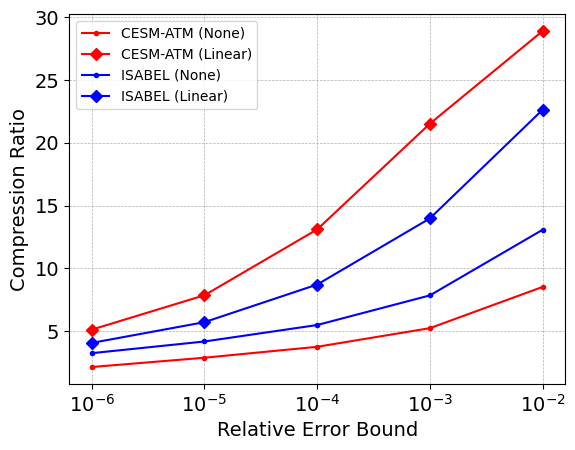

In [5]:
fig, ax = plt.subplots()

# Plot data
ax.plot(error, cesmatm_none, label='CESM-ATM (None)', marker='.', color='red')

ax.plot(error, cesmatm_linear, label='CESM-ATM (Linear)', marker='D', color='red')
ax.plot(error, isabel_none, label='ISABEL (None)', marker='.', color='blue')
ax.plot(error, isabel_linear, label='ISABEL (Linear)', marker='D', color='blue')

# Logarithmic x-axis
ax.set_xscale('log')

# Remove minor ticks
ax.xaxis.set_minor_locator(plt.NullLocator())

# Add grid lines
ax.grid(which='major', linestyle='--', linewidth=0.5)

# Labels and Title
ax.set_xlabel('Relative Error Bound', fontsize=14)
ax.set_ylabel('Compression Ratio', fontsize=14)

# Add a legend
ax.legend()

# Adjust font size
ax.tick_params(axis='both', labelsize=14)

plt.show()

In [6]:
import struct

def read_floats_from_binary_file(filename):
    floats = []
    with open(filename, "rb") as file:
        while True:
            bytes_data = file.read(4)  # read 4 bytes
            if len(bytes_data) < 4:
                break
            float_data = struct.unpack('f', bytes_data)[0]  # 'f' indicates a floating point of 4 bytes
            floats.append(float_data)
    return floats


In [7]:
def normalize(arr):
    # Handle the case of an empty array
    if not arr:
        return []

    # Find the minimum and maximum values of the array
    min_val = min(arr)
    max_val = max(arr)

    # If all values are the same, return a list of ones
    if min_val == max_val:
        return [1 for _ in arr]

    # Normalize the values
    normalized_arr = [(x - min_val) / (max_val - min_val) for x in arr]

    return normalized_arr

EXAALT vs CESM-ATM data visualization

In [8]:
%pip install datashader holoviews pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 910.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 5.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 35.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 26.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 1.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2

In [9]:
%pip install jupyter_bokeh


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 78.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
fontsize = 14
#filename = 'real-datasets/CESM-ATM/AEROD_v_1_1800_3600.f32'
filename = 'real-datasets/EXAALT/dataset1-5423x3137.z.f32.dat'
filename2 = 'real-datasets/CESM-ATM/CLDHGH_1_1800_3600.f32'
float_array = read_floats_from_binary_file(filename)
float_array2 = read_floats_from_binary_file(filename2)


In [11]:
import datetime
import pandas as pd
import numpy as np
import xarray as xr
import datashader as ds
import datashader.transfer_functions as tf

KeyboardInterrupt: 

DATA POINTS 0-999


<Figure size 640x480 with 0 Axes>

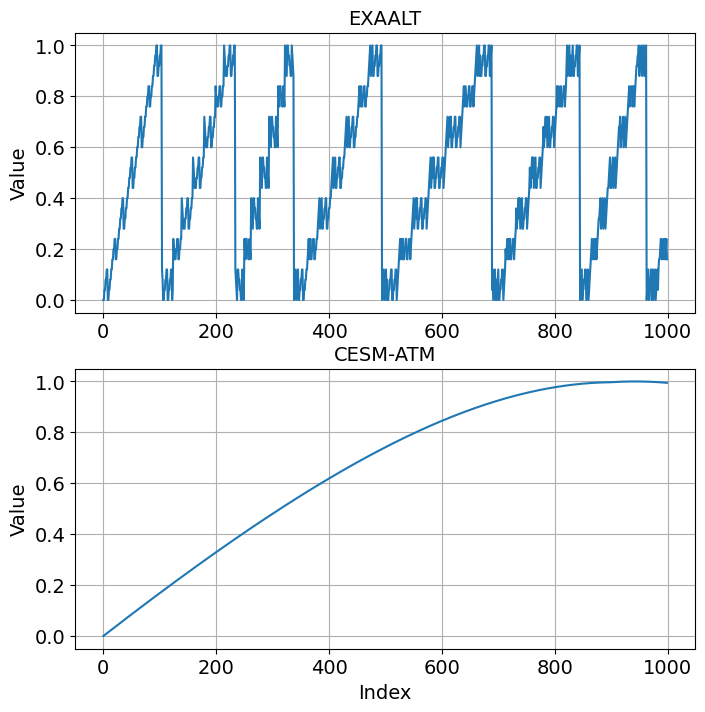

DATA POINTS 200-1199


<Figure size 640x480 with 0 Axes>

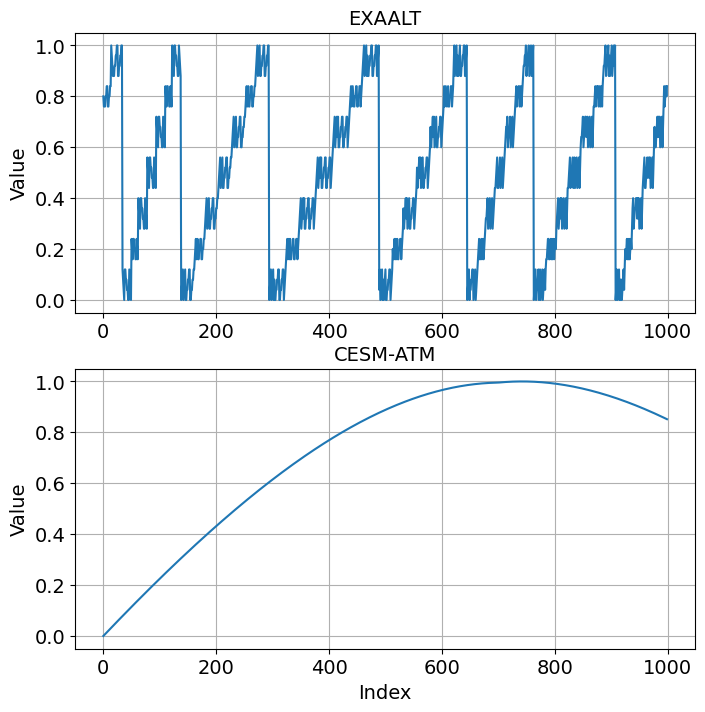

KeyboardInterrupt: Interrupted by user

In [ ]:
start = 0
moveDist = 200
while True:
    print(f"DATA POINTS {start}-{start + 999}")
    # Create the plot
    fig, (ax, ax2) = plt.subplots(2, figsize=(8, 8))
    ax.plot(normalize(float_array[start:start+1000]))
    ax.set_title("EXAALT", fontsize=fontsize)
    ax.set_ylabel('Value', fontsize=fontsize)
    ax.grid(True)   
    
    ax2.plot(normalize(float_array2[start:start+1000]))
    ax2.set_title("CESM-ATM", fontsize=fontsize)
    ax2.set_xlabel('Index', fontsize=fontsize)
    ax2.set_ylabel('Value', fontsize=fontsize)
    ax2.grid(True)

    # Adjust font size and remove sci notation
    ax.tick_params(axis='both', labelsize=fontsize)
    ax2.tick_params(axis='both', labelsize=fontsize)
    plt.show()
    isRight = input("< move >: ") == ">"
    start += moveDist if isRight else -moveDist
    start = max(start, 0)

Quantization levels frequency

In [ ]:
from collections import Counter
import numpy as np
data_exaalt = []
data_cesm = []
# Open the file in read mode
with open('dataset1-5423x3137.x.f32.dat-compressed.bin-quantization-levels.txt', 'r') as f:
    for line in f:
        # Convert the current line to an integer and append it to the list
        data_exaalt.append(int(line.strip()))
with open('CLDHGH_1_1800_3600.f32-compressed.bin-quantization-levels.txt', 'r') as f:
    for line in f:
        # Convert the current line to an integer and append it to the list
        data_cesm.append(int(line.strip()))

In [ ]:
# Filter out outliers
filtered_data_exaalt = [x for x in data_exaalt if -1000 <= x <= 1000]
filtered_data_cesm = [x for x in data_cesm if -200 <= x <= 200]

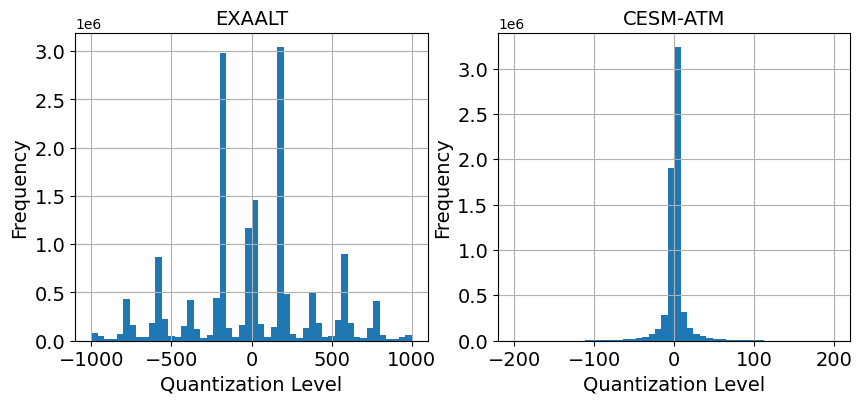

In [ ]:
fontsize = 14

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax.hist(filtered_data_exaalt, bins=50)
ax.set_title("EXAALT", fontsize=fontsize)
ax.set_xlabel('Quantization Level', fontsize=fontsize)
ax.set_ylabel('Frequency', fontsize=fontsize)
ax.grid(True)

ax2.hist(filtered_data_cesm, bins=50)
ax2.set_title("CESM-ATM", fontsize=fontsize)
ax2.set_xlabel('Quantization Level', fontsize=fontsize)
ax2.set_ylabel('Frequency', fontsize=fontsize)
ax2.grid(True)

# Adjust font size and remove sci notation
ax.tick_params(axis='both', labelsize=fontsize)
ax2.tick_params(axis='both', labelsize=fontsize)

plt.show()